In [1]:
%run -i ../python/common.py
publish=False

if not publish:
    # cleanup any old state
    bashCmds('''[[ -d mydir ]] && rm -rf mydir
    [[ -a myfile ]] && rm myfile
    [[ -a errors ]] && rm errors 
    [[ -a mydate ]] && rm mydate
    [[ -a mynewdir ]] && rm -rf mynewdir
    [[ -a anotherfile ]] && rm anotherfile
    [[ -a mybin ]] && rm -rf  mybin
    [[ -a myinfo ]] && rm myinfo''')
else:
    bashCmds('''rm -rf ~/*''')
    
closeAllOpenTtySessions()
bash = BashSession()

generated="~/myfile ~/errors ~/mydate ~/mydir ~/mynewdir ~/out"


(cont:fs:disks)= 
# A bit about Disks

We will talk more about disks when we discuss devices later.  However, most file systems have been designed to work on **hard disk drives**, and understanding a bit about them is important to understand how file systems work.  Hard drives records data magnetically on one or more spinning platters in concentric circular tracks ({numref}`fig:cylinders`).


```{figure} ../images/pb-figures/devs/disk-chs.png
---
width: 50%
name: fig:cylinders

---
A disk drive contains some number of platters, where the same track on different platter called a cylinder.
```

Data on a drive can be identified by the platter surface it is on, the track on that surface, and finally the position on that track. Reading
data from a disk (or writing to it) requires the following steps:

1. Switching the electronics to communicate with the appropriate head; one can generally ignore this, as it's fast.

2. Performing a **seek** that moves the head assembly until the head is positioned over the target track; the time spent to do this is called the **seek time**

3. Waiting for the platter to rotate until the first bit of the target data is passing under the head; **rotational latency**

4. Reading or writing until the last bit has passed under the head; **transfer time**


```{figure} ../images/pb-figures/devs/disk-latency.png
---
width: 80%
name: fig:latency
---
Operations to read a disk sector.
```

The seek and rotational latency have a major effect on disk performance. To give an example, consider randomly accessing 4 KB data blocks on a 7200 RPM (i.e., a disk that rotates at 7200 times per minute).   The average rotational latency would be $4 ms$, i.e., 1/2 the time for a 7200 RPM drive to rotate.  A typical transfer rate might be around 200 MB/s, so to transfer a 4 KB block it would take $(4/1000)/200 = 0.02 sec$.  A common seek time for a drive might be around $8ms$.  

Therefore, a file system that resulted in random reads (or writes) across the whole disk, would end up taking $8 + 4 + 0.02 = 12 ms$ for each block, or having an average throughput of 333 KB/s (i.e., $4/(12/1000)$ ).  If you use the minimum sector size of many disks, at 512 B, you would get only around 41 KB per second, while if you used a 16 KB block, your throughput would go up to around 1.3 MB per second. 


If, on the other hand, the file system always transferred a $5$MB block, it would require $8 + 4 + 25 = 37 ms$ for an average throughput of $134$ MB/s. 

So, when designing a file system,  for performance you want to read relatively big disks blocks, 2) you want to have data frequently accessed together on the same tracks/cylinder, since seeking to nearby tracks is much faster. 


Most files are 4KB, and most of the storage space is used by small number of very big files.  

<function matplotlib.pyplot.show(close=None, block=None)>

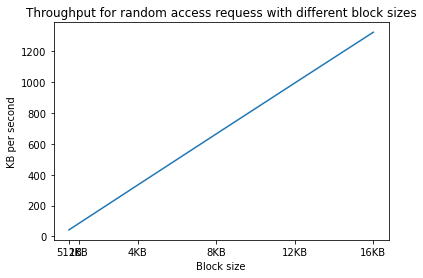

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x_kb_in_block = np.array([.5, 1, 4, 8, 12, 16])
lables_x_axis = ['512B', '1KB', '4KB','8KB', '12KB', '16KB']
tras_in_kbper_msec=np.float32(200.0)

# time to transfer a block is KB 
transfer = (x_kb_in_block/tras_in_kbper_msec)

time_per_block = 8 + 4 + transfer
kb_per_sec = x_kb_in_block/time_per_block *1000
#print(kb_per_sec)

default_x_ticks = range(len(x_kb_in_block))

plt.xlabel("Block size")
plt.ylabel("KB per second")
plt.title("Throughput for random access requess with different block sizes")
plt.xticks(x_kb_in_block, lables_x_axis)
plt.plot(x_kb_in_block, kb_per_sec)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

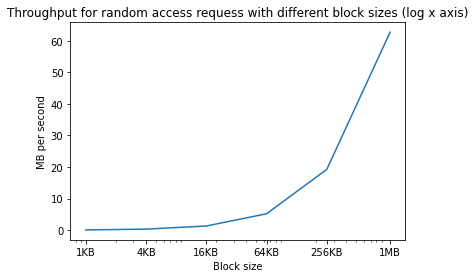

In [73]:
import matplotlib.pyplot as plt
import numpy as np

x_kb_in_block = np.array([1, 4, 16, 64, 256, 1096 ])
lables_x_axis = ['1KB', '4KB', '16KB', '64KB', '256KB', '1MB']
tras_in_kbper_msec=np.float32(200.0)

# time to transfer a block is KB 
transfer = (x_kb_in_block/tras_in_kbper_msec)

time_per_block = 8 + 4 + transfer
MB_per_sec = x_kb_in_block/time_per_block

default_x_ticks = range(len(x_kb_in_block))

plt.title("Throughput for random access requess with different block sizes (log x axis)")

plt.xlabel("Block size")
plt.ylabel("MB per second")
plt.xscale("log")
plt.xticks(x_kb_in_block, lables_x_axis)
plt.plot(x_kb_in_block, MB_per_sec)
plt.show
